In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
'''
    Here we read our google form response csv file and store it
    as a pandas dataframe.
'''
df = pd.read_csv('DP_tendency.csv')
df.head(5)

,Timestamp,Email Address,Name,Institution,In which category you belong to,How Many object oriented languages do you use ?,"On a scale of 1 to 5, where 1 representing low and 5 representing high, please rate your depth of knowledge about polymorphism","On a scale of 1 to 5, where 1 representing low and 5 representing high, please rate your depth of knowledge about encapsulation","On a scale of 1 to 5, where 1 representing for low and 5 representing high, please rate your depth of knowledge about inheritance","How many Gang of Four (Creational, Structural, and Behavioral ) design patterns do you know?",...,"In what percent of your projects, you have used design patterns?",Average LOC (line of code) per project?,Average team size(number of team members) per project?,Average time needed per project? (in working days),What is your most used pattern ?,"""Projects with design patterns tend to produce less bugs after release, compared to projects without design pattern"" . On a scale of 1 to 5, how strongly do you support the statement, where 1 is representing strongly disagree and 5 is representing strongly agree","""Projects with design patterns need less time for a new feature integration, compared to projects without design pattern"" . On a scale of 1 to 5 how strongly do you support the statement, where 1 is representing strongly disagree and 5 is representing strongly agree","""Projects with design patterns results in less added cost for updates, compared to projects without design pattern"" . On a scale of 1 to 5, how strongly do you support the statement, where 1 is representing strongly disagree and 5 is representing strongly agree","""High rate of design pattern application in a software project improves project maintainability"" . On a scale of 1 to 5 how strongly do you support the statement, where 1 is representing strongly disagree and 5 is representing strongly agree",Any Comments about our research
0,11/27/2021 15:04:24,bsse0920@iit.du.ac.bd,Fuad,IIT,Others,2-5,3,3,3,10 to 20,...,less than 30%,less than 10k,3,40,Factory,3,3,5,3.0,very subjective questions
1,11/27/2021 15:06:27,bsse1003@iit.du.ac.bd,Sadi,IIT,Undergrad Student,2-5,1,2,2,1 to 10,...,less than 30%,less than 10k,2,70,no pattern,3,2,3,3.0,Kop Bossss
2,11/27/2021 15:18:05,bsse0809@iit.du.ac.bd,Md. Mehedi Hasan Arif,"IIT, University of Dhaka",Undergrad Student,2-5,3,3,4,1 to 10,...,less than 30%,less than 10k,1,5,NaN,3,3,4,4.0,NaN
3,11/27/2021 15:24:39,bsse1030@iit.du.ac.bd,Abdullah Al Jahid,"IIT, DU",Undergrad Student,2-5,3,3,3,1 to 10,...,less than 30%,less than 10k,1,3,Observer,3,4,4,4.0,Nice topic to work.
4,11/27/2021 15:27:32,bsse1027@iit.du.ac.bd,Junaid Mansur Ifti,IITDU,Undergrad Student,2-5,4,3,4,1 to 10,...,less than 30%,less than 10k,2,90,Singleton,4,2,3,4.0,Love you Radowan and Co.


In [3]:
'''
    Drop out unnecessary columns (user credential, timestamp etc.) from our datafame object.
'''
df = df.drop(['Timestamp', 'Email Address', 'Name', 'Institution', 'What is your most used pattern ?', 'What is your most favorite design pattern among the GoF (Gang of Four) patterns in terms of ease of implementation?', 'Any Comments about our research'], axis=1)
df.head()

,In which category you belong to,How Many object oriented languages do you use ?,"On a scale of 1 to 5, where 1 representing low and 5 representing high, please rate your depth of knowledge about polymorphism","On a scale of 1 to 5, where 1 representing low and 5 representing high, please rate your depth of knowledge about encapsulation","On a scale of 1 to 5, where 1 representing for low and 5 representing high, please rate your depth of knowledge about inheritance","How many Gang of Four (Creational, Structural, and Behavioral ) design patterns do you know?",How many design patterns( Gang of Four) have you implemented as an assignment or dummy project?,"In what percent of your projects, you have used design patterns?",Average LOC (line of code) per project?,Average team size(number of team members) per project?,Average time needed per project? (in working days),"""Projects with design patterns tend to produce less bugs after release, compared to projects without design pattern"" . On a scale of 1 to 5, how strongly do you support the statement, where 1 is representing strongly disagree and 5 is representing strongly agree","""Projects with design patterns need less time for a new feature integration, compared to projects without design pattern"" . On a scale of 1 to 5 how strongly do you support the statement, where 1 is representing strongly disagree and 5 is representing strongly agree","""Projects with design patterns results in less added cost for updates, compared to projects without design pattern"" . On a scale of 1 to 5, how strongly do you support the statement, where 1 is representing strongly disagree and 5 is representing strongly agree","""High rate of design pattern application in a software project improves project maintainability"" . On a scale of 1 to 5 how strongly do you support the statement, where 1 is representing strongly disagree and 5 is representing strongly agree"
0,Others,2-5,3,3,3,10 to 20,5 to 10,less than 30%,less than 10k,3,40,3,3,5,3.0
1,Undergrad Student,2-5,1,2,2,1 to 10,1 to 5,less than 30%,less than 10k,2,70,3,2,3,3.0
2,Undergrad Student,2-5,3,3,4,1 to 10,1 to 5,less than 30%,less than 10k,1,5,3,3,4,4.0
3,Undergrad Student,2-5,3,3,3,1 to 10,1 to 5,less than 30%,less than 10k,1,3,3,4,4,4.0
4,Undergrad Student,2-5,4,3,4,1 to 10,1 to 5,less than 30%,less than 10k,2,90,4,2,3,4.0


In [4]:
'''
    Change our column's name with some suitable and short name
'''
new_column_name = ['category', 'number_of_known_oop_language', 'polymorphism_knowledge', 'encapsulation_knowledge', 'inheritance_knowledge', 'known_DP', 'implemented_DP', 'dp_use_percentage', 
'LOC', 'team_size', 'time_per_project', 'bug_reduction', 'time_reduction', 'cost_reduction', 'improve_maintainability']
renamed_columns = {}
for i, column in enumerate(df.columns):
    renamed_columns[column] = new_column_name[i]
# print(renamed_columns)
df = df.rename(columns=renamed_columns)
df.head(5)

,category,number_of_known_oop_language,polymorphism_knowledge,encapsulation_knowledge,inheritance_knowledge,known_DP,implemented_DP,dp_use_percentage,LOC,team_size,time_per_project,bug_reduction,time_reduction,cost_reduction,improve_maintainability
0,Others,2-5,3,3,3,10 to 20,5 to 10,less than 30%,less than 10k,3,40,3,3,5,3.0
1,Undergrad Student,2-5,1,2,2,1 to 10,1 to 5,less than 30%,less than 10k,2,70,3,2,3,3.0
2,Undergrad Student,2-5,3,3,4,1 to 10,1 to 5,less than 30%,less than 10k,1,5,3,3,4,4.0
3,Undergrad Student,2-5,3,3,3,1 to 10,1 to 5,less than 30%,less than 10k,1,3,3,4,4,4.0
4,Undergrad Student,2-5,4,3,4,1 to 10,1 to 5,less than 30%,less than 10k,2,90,4,2,3,4.0


In [5]:
'''
    We convert our categorical data into numeric values.
'''
df['category'].replace(to_replace=['Undergrad Student', 'Intern/ Software Engineer Trainee (Completed / ongoing)', 'Junior Software Engineer', 'Others'], value=['student', 'student', 'professional', 'professional'], inplace=True)
df['number_of_known_oop_language'].replace(to_replace=['1', '2-5', '5-10', 'more than 10'], value=[1, 2, 3, 4], inplace=True)
df['known_DP'].replace(to_replace=['0', '1 to 10', '10 to 20', 'More than 20'], value=[1, 2, 3, 4], inplace=True)
df['implemented_DP'].replace(to_replace=['0', '1 to 5', '5 to 10', '11 to 15', 'more than 15'], value=[1, 2, 3, 4, 5], inplace=True)
df['dp_use_percentage'].replace(to_replace=['less than 30%', '31% to 60%', '61% to 90%', 'more than 90%'], value=[1, 2, 3, 4], inplace=True)
df['LOC'].replace(to_replace=['less than 10k', '10k to 100k', '100k to 1M', 'more than 1M'], value=[1, 2, 3, 4], inplace=True)
df.head(5)

,category,number_of_known_oop_language,polymorphism_knowledge,encapsulation_knowledge,inheritance_knowledge,known_DP,implemented_DP,dp_use_percentage,LOC,team_size,time_per_project,bug_reduction,time_reduction,cost_reduction,improve_maintainability
0,professional,2,3,3,3,3,3,1,1,3,40,3,3,5,3.0
1,student,2,1,2,2,2,2,1,1,2,70,3,2,3,3.0
2,student,2,3,3,4,2,2,1,1,1,5,3,3,4,4.0
3,student,2,3,3,3,2,2,1,1,1,3,3,4,4,4.0
4,student,2,4,3,4,2,2,1,1,2,90,4,2,3,4.0


In [6]:
'''
    we calculate some derived metrics
    Store calculated derived metrics in some new columns of Dataframe.
    Here we calculate our main measurement metrics 'DesignPattern_Implementation_Tendency_Score' and
    Store it in 'DP_tendency_score' column
'''
df['OOP_knowledge'] = df[['number_of_known_oop_language', 'polymorphism_knowledge', 'encapsulation_knowledge', 'inheritance_knowledge']].mean(axis=1)
df['knowledge_score'] = df[['OOP_knowledge', 'known_DP', 'implemented_DP']].mean(axis=1)
df['experience_score'] = ((df['LOC']/df['time_per_project']) + df['team_size'])/2
df['effeciency_score'] = df[['bug_reduction', 'time_reduction', 'cost_reduction', 'improve_maintainability']].mean(axis=1)
df['DP_tendency_score'] = df[['knowledge_score', 'experience_score', 'effeciency_score']].mean(axis=1)
df.head(5)

,category,number_of_known_oop_language,polymorphism_knowledge,encapsulation_knowledge,inheritance_knowledge,known_DP,implemented_DP,dp_use_percentage,LOC,team_size,time_per_project,bug_reduction,time_reduction,cost_reduction,improve_maintainability,OOP_knowledge,knowledge_score,experience_score,effeciency_score,DP_tendency_score
0,professional,2,3,3,3,3,3,1,1,3,40,3,3,5,3.0,2.75,2.916667,1.512500,3.50,2.643056
1,student,2,1,2,2,2,2,1,1,2,70,3,2,3,3.0,1.75,1.916667,1.007143,2.75,1.891270
2,student,2,3,3,4,2,2,1,1,1,5,3,3,4,4.0,3.00,2.333333,0.600000,3.50,2.144444
3,student,2,3,3,3,2,2,1,1,1,3,3,4,4,4.0,2.75,2.250000,0.666667,3.75,2.222222
4,student,2,4,3,4,2,2,1,1,2,90,4,2,3,4.0,3.25,2.416667,1.005556,3.25,2.224074


In [7]:
'''
    We try to see the correlation among the features/ metrics.
'''
df.corr()

,number_of_known_oop_language,polymorphism_knowledge,encapsulation_knowledge,inheritance_knowledge,known_DP,implemented_DP,dp_use_percentage,LOC,team_size,time_per_project,bug_reduction,time_reduction,cost_reduction,improve_maintainability,OOP_knowledge,knowledge_score,experience_score,effeciency_score,DP_tendency_score
number_of_known_oop_language,1.000000,0.227209,0.202101,0.298869,0.206169,0.252830,0.172664,0.007926,-0.009994,0.047324,0.094991,0.188080,0.178739,0.196181,0.401655,0.366535,-0.011140,0.218926,0.118115
polymorphism_knowledge,0.227209,1.000000,0.869710,0.815431,0.266413,0.415546,0.409157,0.313798,0.161576,0.100928,0.342009,0.433528,0.407876,0.342216,0.940239,0.701328,0.164289,0.515017,0.402522
encapsulation_knowledge,0.202101,0.869710,1.000000,0.761970,0.256166,0.448090,0.395334,0.248505,0.132822,0.082290,0.310224,0.428431,0.412867,0.266383,0.915463,0.704354,0.134998,0.478933,0.370465
inheritance_knowledge,0.298869,0.815431,0.761970,1.000000,0.210727,0.297247,0.334437,0.226745,0.086556,0.040419,0.376370,0.461737,0.395136,0.401340,0.921637,0.615262,0.087050,0.551484,0.328705
known_DP,0.206169,0.266413,0.256166,0.210727,1.000000,0.608937,0.230217,0.216655,0.096151,-0.051726,0.274180,0.205632,0.470744,0.061992,0.278361,0.738109,0.096390,0.339042,0.313110
implemented_DP,0.252830,0.415546,0.448090,0.297247,0.608937,1.000000,0.378063,0.276501,0.208360,-0.084966,0.272885,0.241208,0.301562,0.264332,0.427852,0.886212,0.206068,0.362685,0.440783
dp_use_percentage,0.172664,0.409157,0.395334,0.334437,0.230217,0.378063,1.000000,0.485442,0.445271,-0.094168,0.164096,0.304945,0.317902,0.122211,0.409888,0.442119,0.447581,0.307124,0.535700
LOC,0.007926,0.313798,0.248505,0.226745,0.216655,0.276501,0.485442,1.000000,0.702230,0.252846,0.072207,0.182624,0.155923,0.058310,0.267005,0.323846,0.703660,0.158985,0.689587
team_size,-0.009994,0.161576,0.132822,0.086556,0.096151,0.208360,0.445271,0.702230,1.000000,-0.049630,0.203910,0.169163,0.165922,0.179552,0.126012,0.191242,0.999784,0.242080,0.927202
time_per_project,0.047324,0.100928,0.082290,0.040419,-0.051726,-0.084966,-0.094168,0.252846,-0.049630,1.000000,-0.141630,-0.000003,-0.009873,0.006607,0.081815,-0.024302,-0.051850,-0.049071,-0.059538


In [8]:
'''
    Now, we try to see the design pattern tendency of Student and 
    Professionals group separately. 
'''
students = df[df.category == 'student']
students.head(5)

,category,number_of_known_oop_language,polymorphism_knowledge,encapsulation_knowledge,inheritance_knowledge,known_DP,implemented_DP,dp_use_percentage,LOC,team_size,time_per_project,bug_reduction,time_reduction,cost_reduction,improve_maintainability,OOP_knowledge,knowledge_score,experience_score,effeciency_score,DP_tendency_score
1,student,2,1,2,2,2,2,1,1,2,70,3,2,3,3.0,1.75,1.916667,1.007143,2.75,1.891270
2,student,2,3,3,4,2,2,1,1,1,5,3,3,4,4.0,3.00,2.333333,0.600000,3.50,2.144444
3,student,2,3,3,3,2,2,1,1,1,3,3,4,4,4.0,2.75,2.250000,0.666667,3.75,2.222222
4,student,2,4,3,4,2,2,1,1,2,90,4,2,3,4.0,3.25,2.416667,1.005556,3.25,2.224074
5,student,2,2,2,2,2,2,1,1,2,90,3,2,3,4.0,2.00,2.000000,1.005556,3.00,2.001852


<AxesSubplot:>

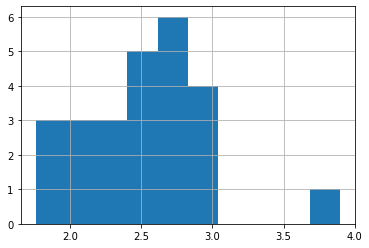

In [9]:
'''
    Histogram show the student's design pattern implementation tendency distribution 
'''

students['DP_tendency_score'].hist()

In [10]:
'''
    We extract a new datafame for professionals and try to understand
    the design pattern tendency of professionals group.
'''

professionals = df[df.category == 'professional']
professionals.head()

,category,number_of_known_oop_language,polymorphism_knowledge,encapsulation_knowledge,inheritance_knowledge,known_DP,implemented_DP,dp_use_percentage,LOC,team_size,time_per_project,bug_reduction,time_reduction,cost_reduction,improve_maintainability,OOP_knowledge,knowledge_score,experience_score,effeciency_score,DP_tendency_score
0,professional,2,3,3,3,3,3,1,1,3,40,3,3,5,3.0,2.75,2.916667,1.512500,3.50,2.643056
10,professional,2,4,5,4,3,4,3,2,3,180,3,4,5,4.0,3.75,3.583333,1.505556,4.00,3.029630
15,professional,2,5,5,5,2,2,1,2,5,25,4,4,4,3.0,4.25,2.750000,2.540000,3.75,3.013333
16,professional,1,3,3,3,2,4,1,2,6,300,4,4,3,4.0,2.50,2.833333,3.003333,3.75,3.195556
17,professional,2,3,3,4,2,2,2,1,3,50,5,4,4,4.0,3.00,2.333333,1.510000,4.25,2.697778


<AxesSubplot:>

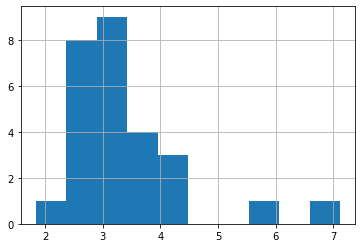

In [11]:
'''
    Histogram show the professional's design pattern implementation tendency distribution 
'''
professionals['DP_tendency_score'].hist()

In [12]:
'''
    Now we have 2 sample
    one is for students and
    one for professionals
    we try to see the average score of design pattern implementation between the two group
''' 
students.DP_tendency_score.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 1     1.891270
2     2.144444
3     2.222222
4     2.224074
5     2.001852
6     2.422222
7     2.662698
8     3.897222
9     2.558333
11    3.030556
12    2.783333
13    1.758333
14    2.983333
18    2.591667
20    2.777778
21    2.508333
22    2.806667
26    1.816667
27    2.791667
28    2.155556
30    2.983333
34    2.755556
36    2.594444
39    2.394444
43    2.977778
Name: DP_tendency_score, dtype: float64>

In [13]:
# Average DP_tendency_score of Professional's group
professionals.DP_tendency_score.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0     2.643056
10    3.029630
15    3.013333
16    3.195556
17    2.697778
19    4.002778
23    3.890139
24    3.056481
25    3.119444
29    2.836667
31    5.722937
32    3.222222
33    3.450000
35    4.427778
37    2.891667
38    3.531944
40    1.837500
41    2.975000
42    2.587500
44    2.473889
45    2.583333
46    4.168056
47    3.107143
48    3.451852
49    2.952778
50    7.118519
51    2.750417
Name: DP_tendency_score, dtype: float64>

In [14]:
import scipy.stats as stats

In [15]:
'''
    We assume that , professional's group have higher design pattern implementation tendancy than Students group.
    here, μ1 = mean 'DP_tendency_score' of professional users group
          μ2 = mean 'DP_tendency_score' of student users group
    So, Our null hypothesis (H0): μ1 = μ2
        Alternative hypothesis (HA): μ1 > μ2
    Here, We perform a 2 sample t-test to see, if we reject the null hypothesis with Higher Confidence Interval value
'''
t_stat, p_val = stats.ttest_ind(students['DP_tendency_score'], professionals['DP_tendency_score'], equal_var=False)
print(t_stat, p_val)

-3.6103291625006606 0.0009107071771683336


In [16]:
df1 = df.drop('category', axis=1)
df_norm = (df1-df1.min())/(df1.max()-df1.min())
df_norm = pd.concat((df_norm, df.category), 1)
df_norm.head(5)

C:\Users\iit\AppData\Local\Temp/ipykernel_8984/2498064447.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df_norm = pd.concat((df_norm, df.category), 1)


,number_of_known_oop_language,polymorphism_knowledge,encapsulation_knowledge,inheritance_knowledge,known_DP,implemented_DP,dp_use_percentage,LOC,team_size,time_per_project,bug_reduction,time_reduction,cost_reduction,improve_maintainability,OOP_knowledge,knowledge_score,experience_score,effeciency_score,DP_tendency_score,category
0,0.5,0.50,0.50,0.50,1.0,0.50,0.0,0.0,0.076923,3.700001e-06,0.333333,0.333333,1.000000,0.333333,0.538462,0.621622,0.075385,0.454545,0.165054,professional
1,0.5,0.00,0.25,0.25,0.5,0.25,0.0,0.0,0.038462,6.700002e-06,0.333333,0.000000,0.333333,0.333333,0.230769,0.297297,0.036478,0.181818,0.024801,student
2,0.5,0.50,0.50,0.75,0.5,0.25,0.0,0.0,0.000000,2.000001e-07,0.333333,0.333333,0.666667,0.666667,0.615385,0.432432,0.005133,0.454545,0.072033,student
3,0.5,0.50,0.50,0.50,0.5,0.25,0.0,0.0,0.000000,0.000000e+00,0.333333,0.666667,0.666667,0.666667,0.538462,0.405405,0.010265,0.545455,0.086543,student
4,0.5,0.75,0.50,0.75,0.5,0.25,0.0,0.0,0.038462,8.700003e-06,0.666667,0.000000,0.333333,0.666667,0.692308,0.459459,0.036356,0.363636,0.086889,student
